In [1]:
import numpy as np
import matplotlib.pyplot as plt
from brian2 import *
import os
import tensorflow_datasets as tfds
import soundfile as sf

WARNING    /Users/minhhieunguyen/Documents/Projects/Dissertation/Code/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 [py.warnings]
WARNING    /Users/minhhieunguyen/Documents/Projects/Dissertation/Code/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
 [py.warnings]


In [2]:
from spike_train.synthetic_spike_train import SpikeTrainGenerator

generator = SpikeTrainGenerator()

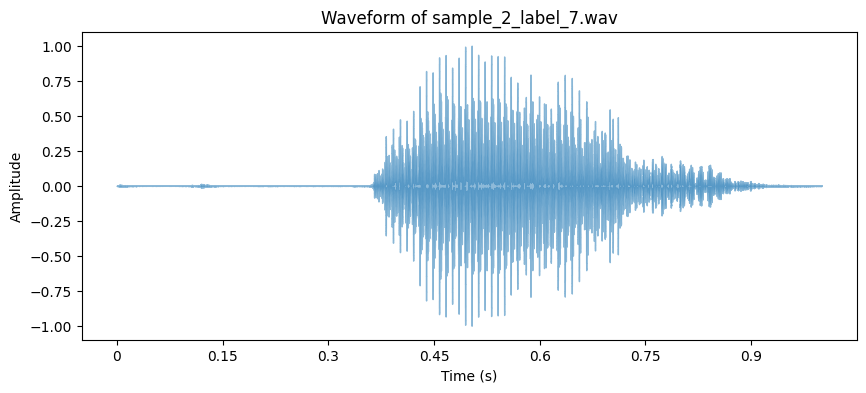

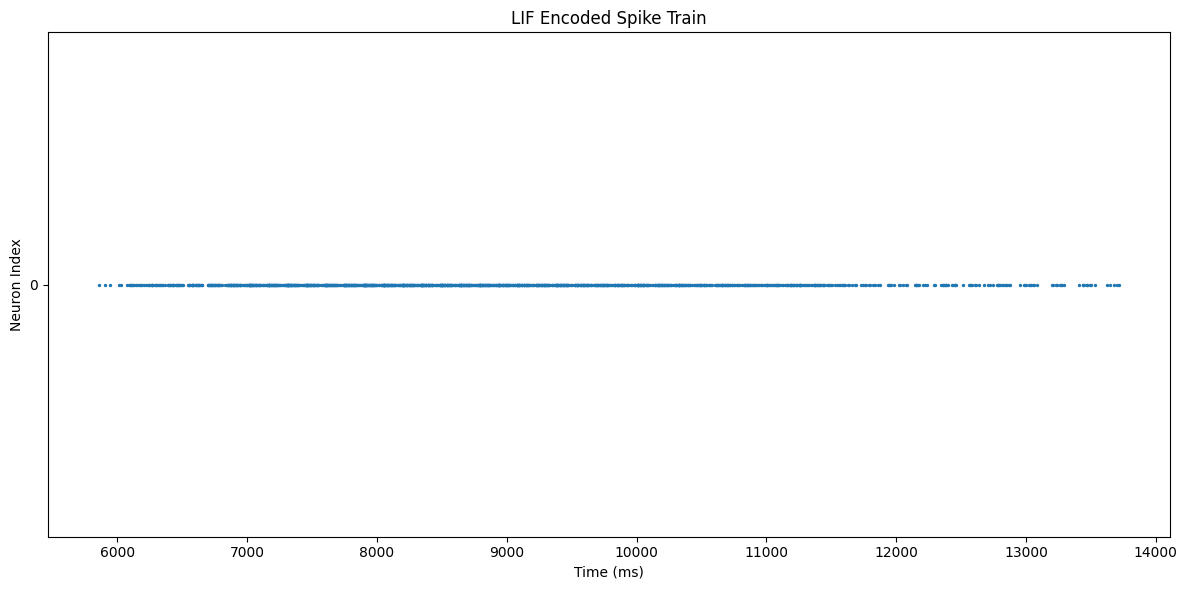

[[0 0 0 ... 0 0 0]]


In [3]:
spike = generator.audio_to_spike_lif(
    filepath="speech_commands_samples/sample_3_label_5.wav",
    resample=False,
    plot=True
)

print(spike)

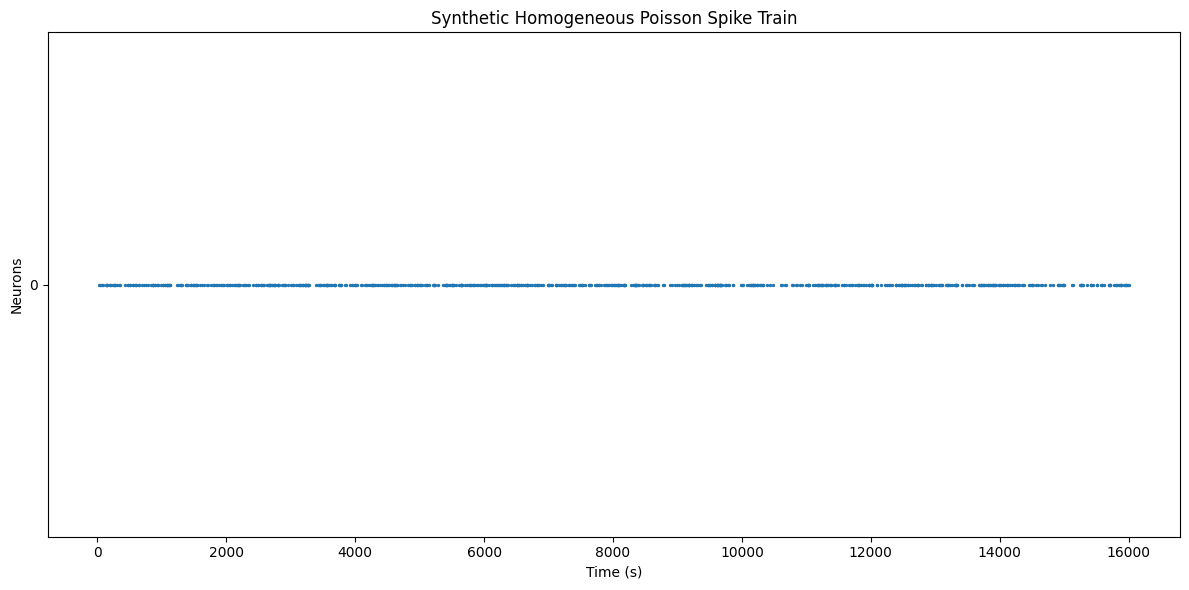

In [4]:
homo_spike_train = generator.generate_homogeneous_poisson_spikes(
    n_neurons=1,
    duration=16,
    rate=50
)

generator.plot_spike_train(
    spike_train=homo_spike_train,
    title="Synthetic Homogeneous Poisson Spike Train"
)

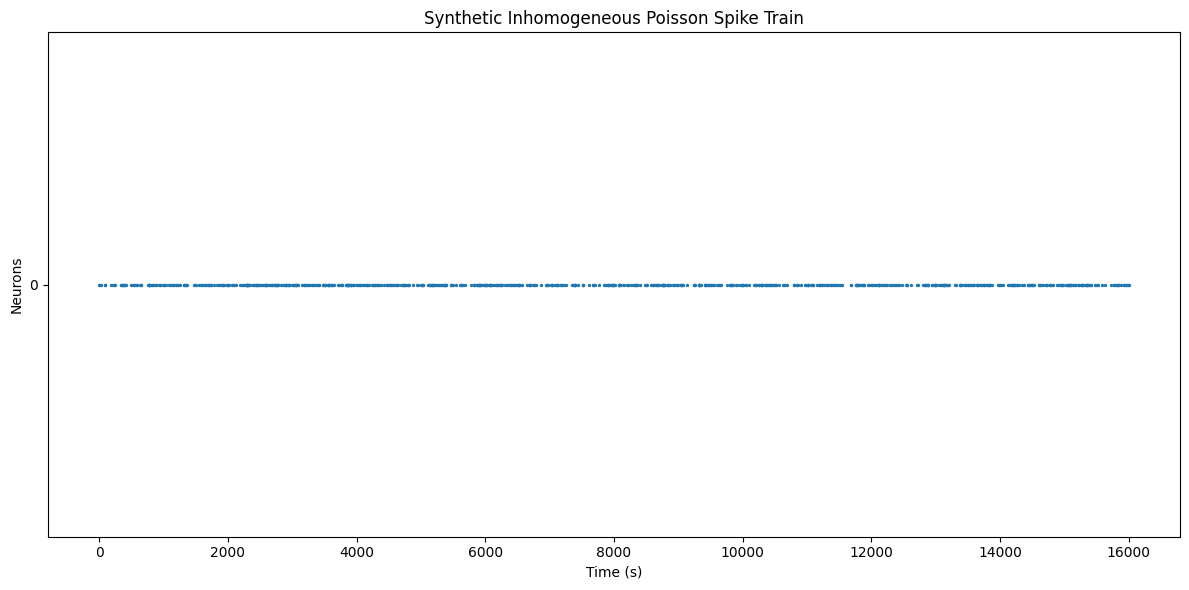

In [5]:
inhomo_spike_train = generator.generate_inhomogeneous_poisson_spikes(
    n_neurons=1,
    duration=16,
    rate_fn=lambda t: 50 + 30 * np.sin(2 * np.pi * t)
)
generator.plot_spike_train(
    spike_train=inhomo_spike_train,
    title="Synthetic Inhomogeneous Poisson Spike Train"
)

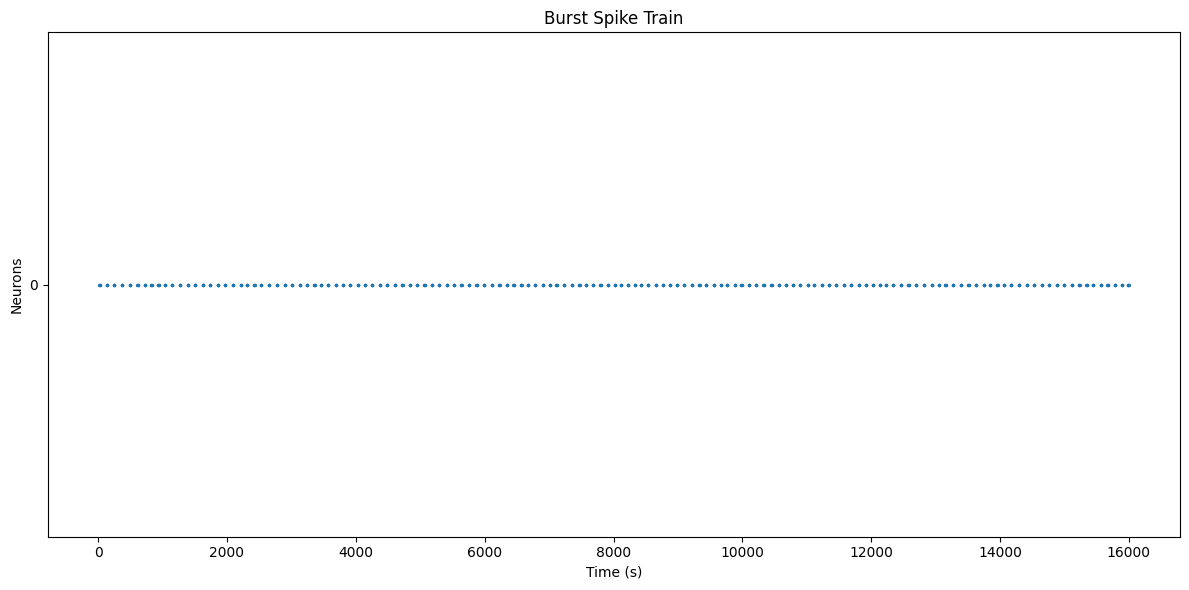

In [6]:
burst_spike_train = generator.generate_burst_spike(
    n_neurons=1,
    duration=16
)

generator.plot_spike_train(
    spike_train=burst_spike_train,
    title="Burst Spike Train"
)

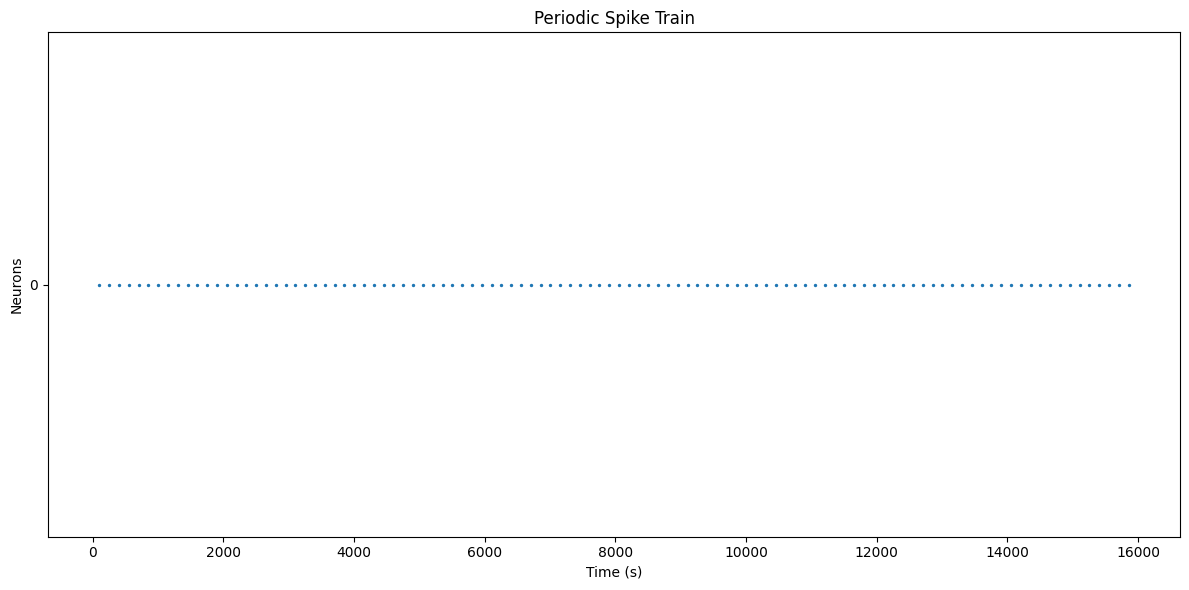

In [7]:
periodic_spike_train = generator.generate_periodic_spikes(
    n_neurons=1,
    intervals=[150],
    duration=16)

generator.plot_spike_train(
    spike_train=periodic_spike_train,
    title="Periodic Spike Train"
)

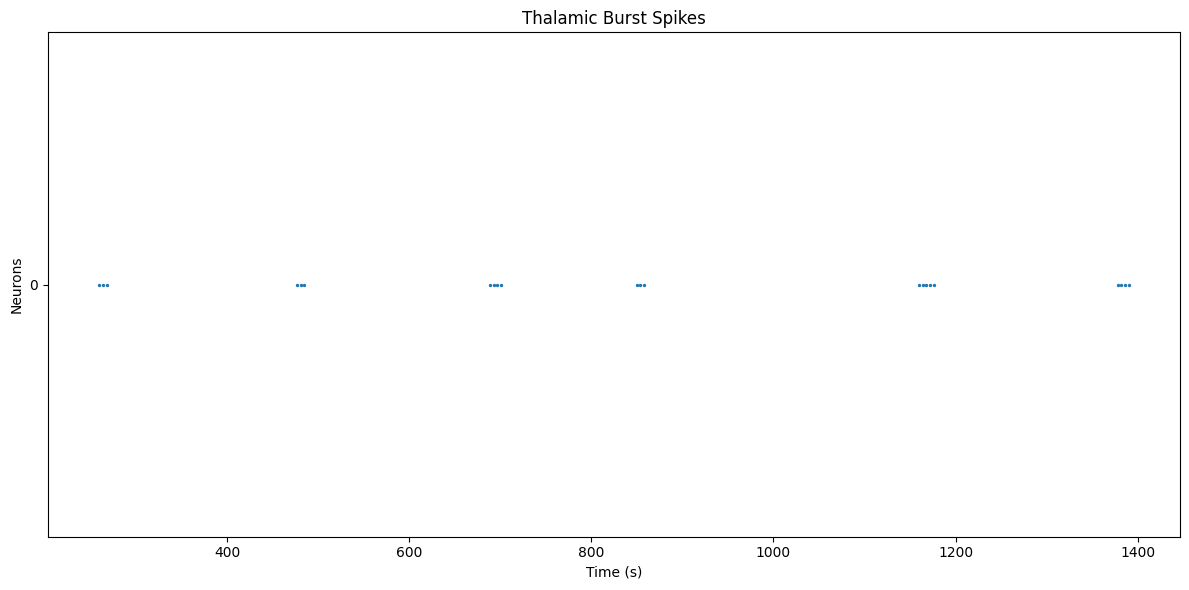

In [16]:
thalamic_burst_spikes = generator.generate_thalamic_burst_spikes(
    n_neurons=1,
    duration=1
)

generator.plot_spike_train(thalamic_burst_spikes, title="Thalamic Burst Spikes")


In [9]:
from snn.snn import SpikingNeuralNetwork

WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]
WARNING    Cannot use Cython, a test compilation failed: Cython is not available (ImportError)
Certain compiler configurations (e.g. clang in a conda environment on OS X) are known to be problematic. Note that you can switch the compiler by setting the 'CC' and 'CXX' environment variables. For example, you may want to try 'CC=gcc' and 'CXX=g++'. [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


Spikes: 2248


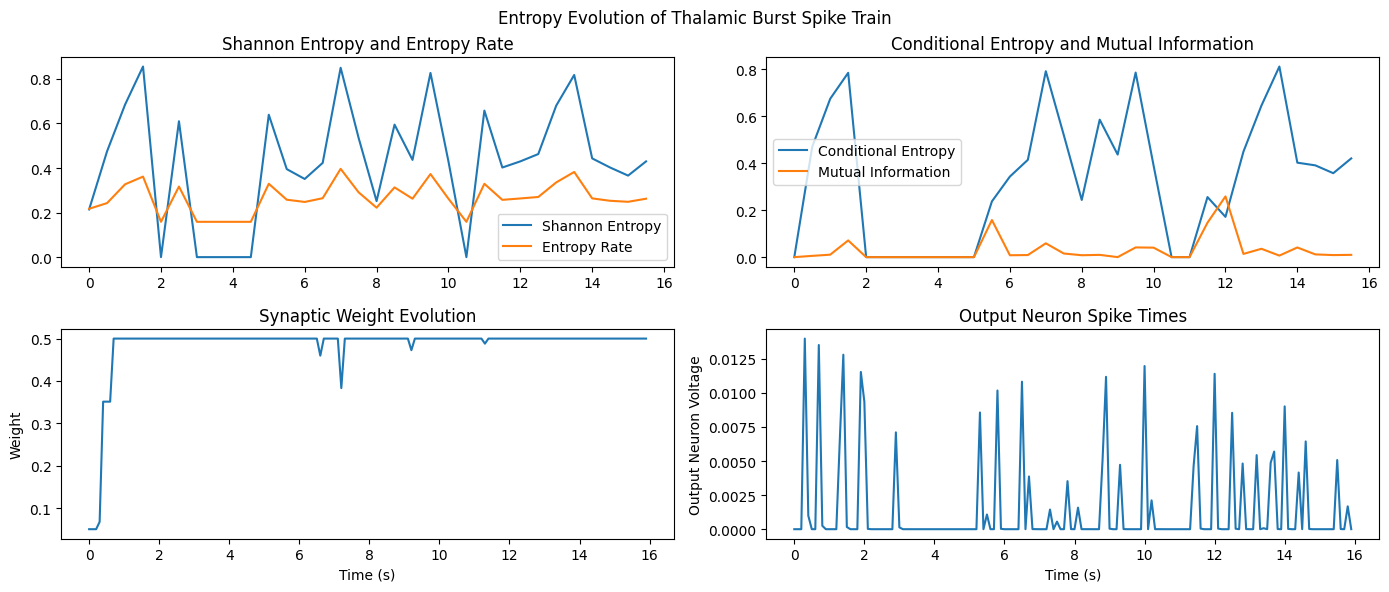

In [10]:
snn = SpikingNeuralNetwork()
results = snn.train_single_stdp(
    spike_train=thalamic_burst_spikes,
    interval=500*ms,
    duration=16000*ms,
    v_threshold=0.015,
    refractory=0*ms,
    gmax=0.5,
    title="Entropy Evolution of Thalamic Burst Spike Train"
)

Spikes: 12322


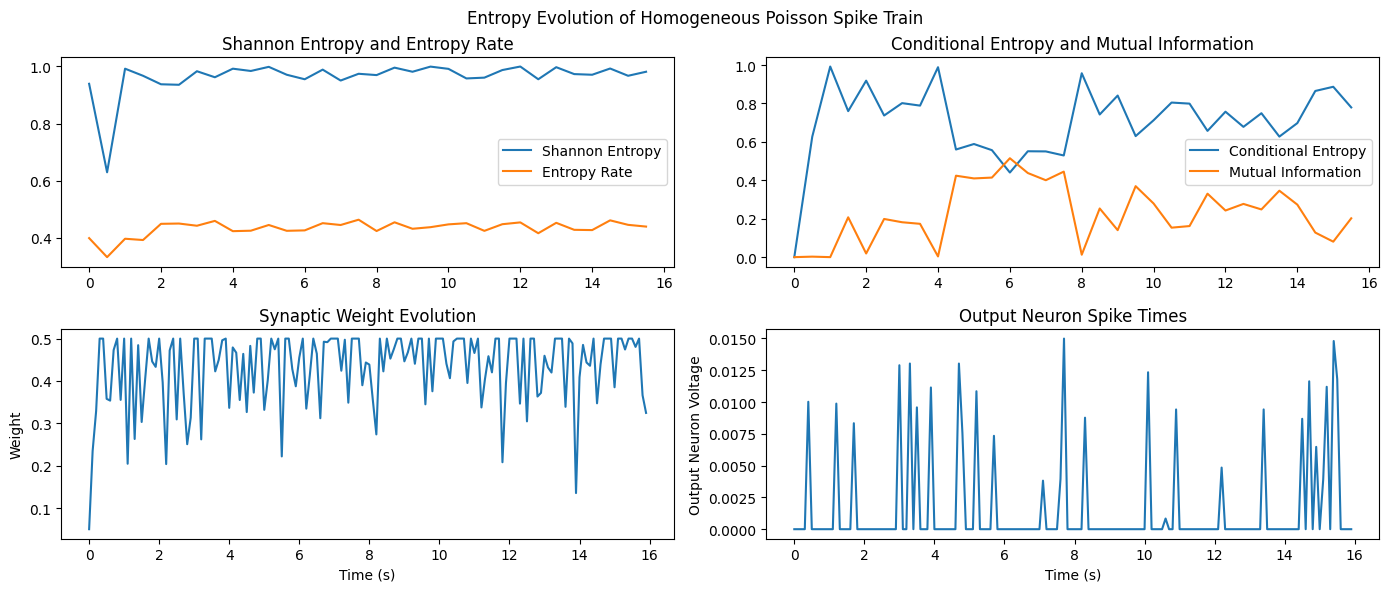

In [11]:
snn = SpikingNeuralNetwork()
results = snn.train_single_stdp(
    spike_train=homo_spike_train,
    interval=500*ms,
    duration=16000*ms,
    v_threshold=0.015,
    refractory=0*ms,
    gmax=0.5,
    title="Entropy Evolution of Homogeneous Poisson Spike Train"
)

Spikes: 12081


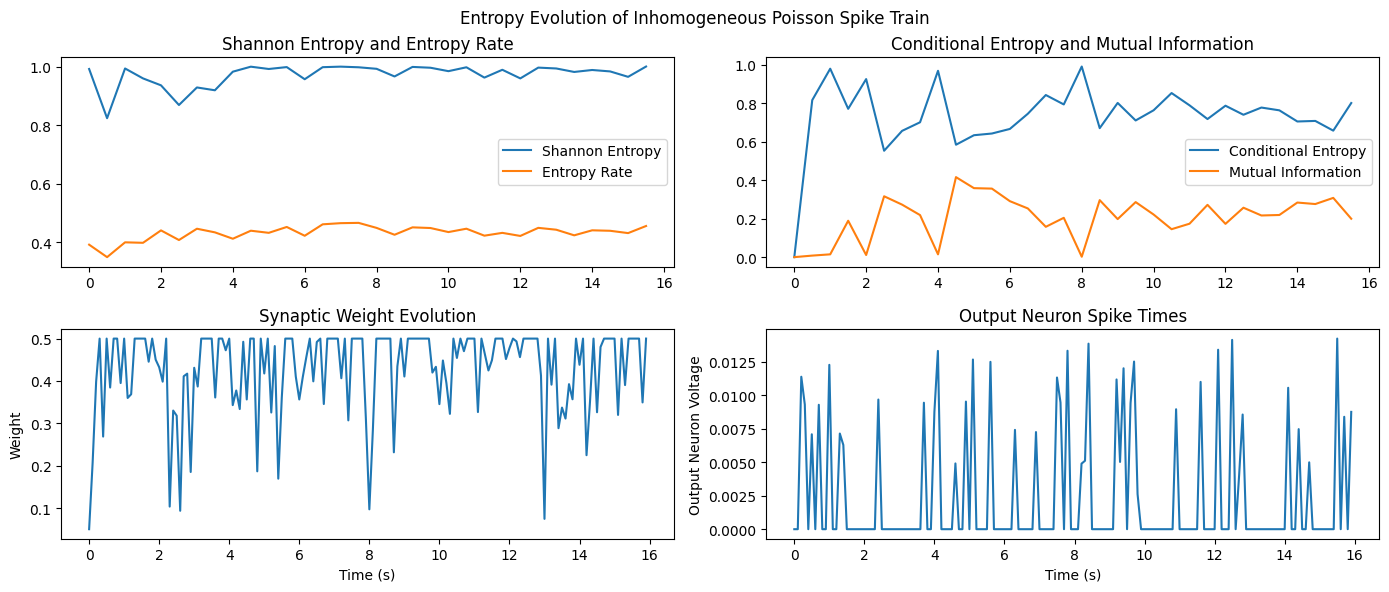

In [12]:
snn = SpikingNeuralNetwork()
results = snn.train_single_stdp(
    spike_train=inhomo_spike_train,
    interval=500*ms,
    duration=16000*ms,
    v_threshold=0.015,
    refractory=0*ms,
    gmax=0.5,
    title="Entropy Evolution of Inhomogeneous Poisson Spike Train"
)

Spikes: 6844


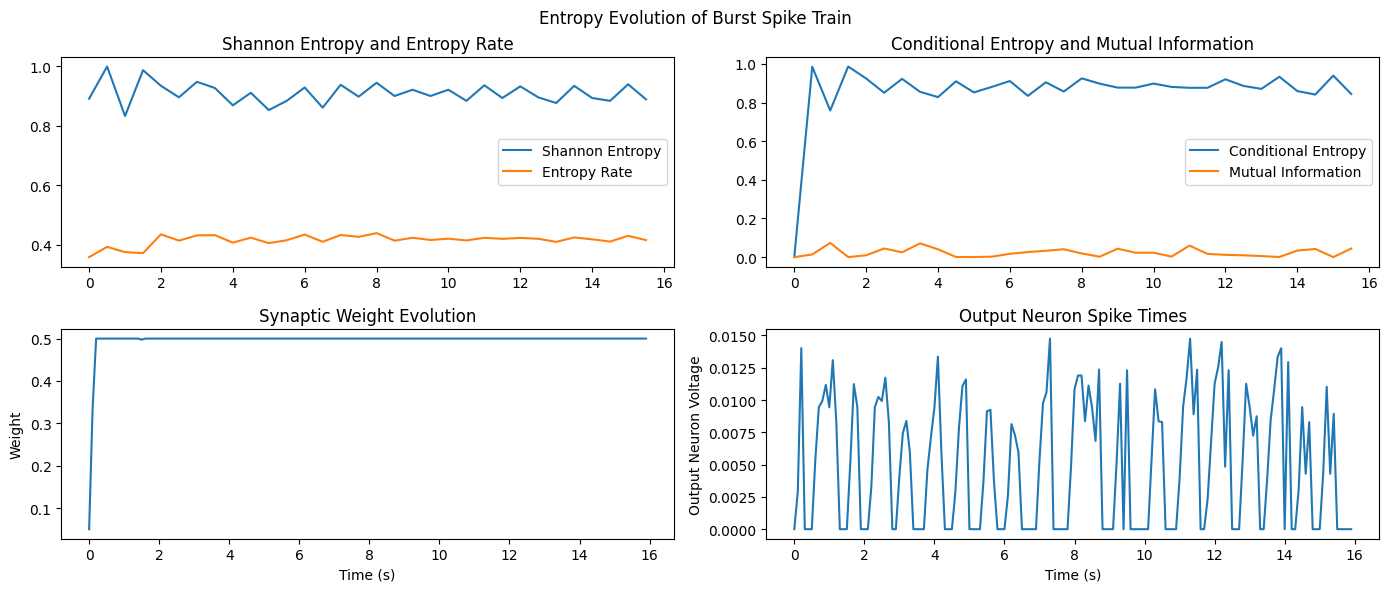

In [13]:
snn = SpikingNeuralNetwork()
results = snn.train_single_stdp(
    spike_train=burst_spike_train,
    interval=500*ms,
    duration=16000*ms,
    v_threshold=0.015,
    refractory=0*ms,
    gmax=0.5,
    title="Entropy Evolution of Burst Spike Train"
)

Spikes: 2622


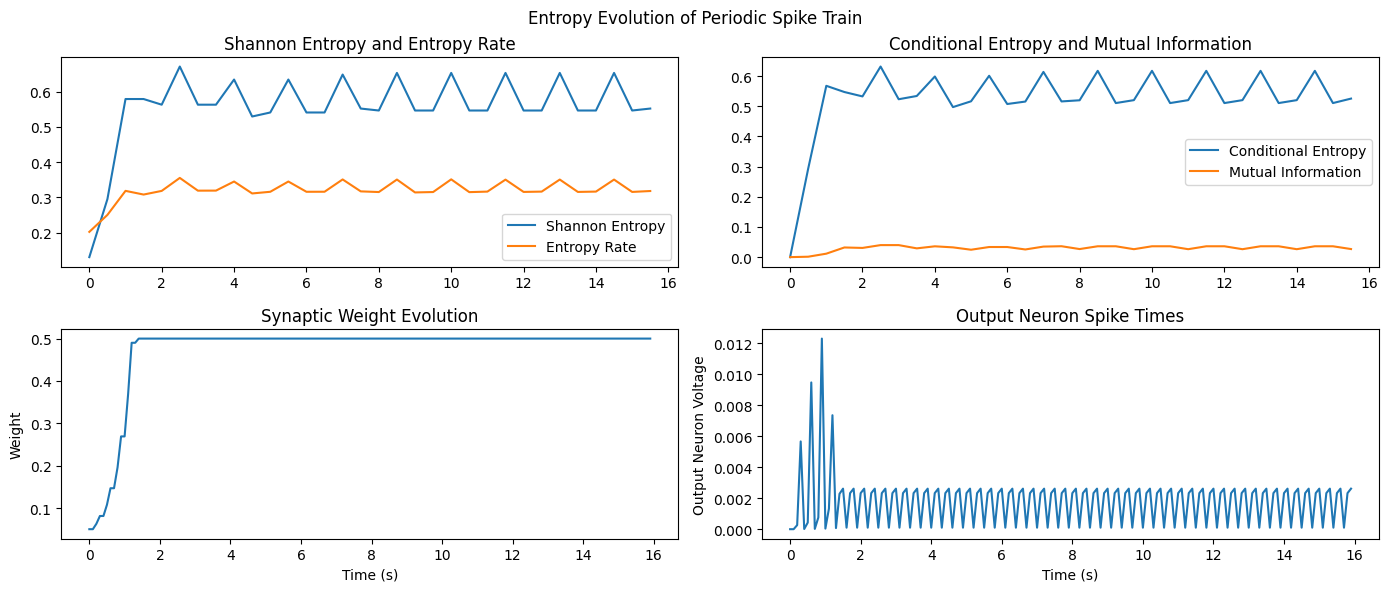

In [14]:
snn = SpikingNeuralNetwork()
results = snn.train_single_stdp(
    spike_train=periodic_spike_train,
    interval=500*ms,
    duration=16000*ms,
    v_threshold=0.015,
    refractory=0*ms,
    gmax=0.5,
    title="Entropy Evolution of Periodic Spike Train"
)

Spikes: 7211


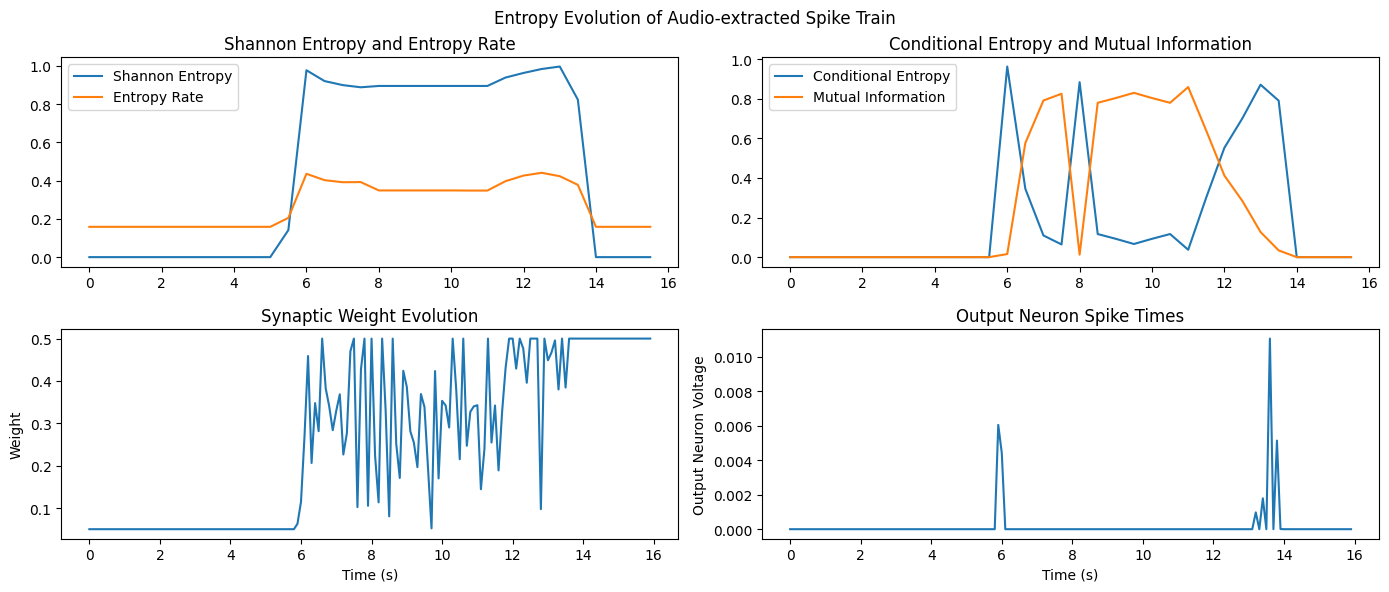

In [15]:
snn = SpikingNeuralNetwork()
results = snn.train_single_stdp(
    spike_train=spike,
    interval=500*ms,
    duration=16000*ms,
    v_threshold=0.015,
    refractory=0*ms,
    gmax=0.5,
    title="Entropy Evolution of Audio-extracted Spike Train"
)